In [33]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.ndimage import zoom

In [36]:
image = Image.open("gs-img-02.png")
# image

In [37]:
# Load a grayscale image (example: convert any input image to grayscale)
def load_grayscale_image(image_path):
    image = Image.open(image_path).convert('L')  # Convert image to grayscale
    return np.array(image)

In [38]:
# Normalize dimensions to the range [0, 1]
def normalize_dimensions(image):
    height, width = image.shape
    normalized_dimensions = np.indices((height, width)).astype(float)
    normalized_dimensions[0] /= height - 1  # Normalize rows (y-coordinates)
    normalized_dimensions[1] /= width - 1   # Normalize columns (x-coordinates)
    return normalized_dimensions

In [112]:
# Resize the image to 64x64
def resize_image(image, size=(32, 32)):
    height, width = image.shape
    return zoom(image, (size[0] / height, size[1] / width), order=1)

In [113]:
def plot_results(original_image, resized_image):
    # Flatten the resized image for histogram
    resized_pixel_values = resized_image.flatten()

    # Create a 3D plot showing the pixel histogram
    fig = plt.figure(figsize=(15, 5))

    # Plot 1: Original grayscale image
    ax1 = fig.add_subplot(1, 3, 1)
    ax1.imshow(original_image, cmap='gray', interpolation='nearest')
    ax1.set_title("Original Grayscale Image")
    ax1.axis('off')

    # Plot 2: Resized image (64x64)
    ax2 = fig.add_subplot(1, 3, 2)
    ax2.imshow(resized_image, cmap='gray', interpolation='nearest')
    ax2.set_title("Resized Image (64x64)")
    ax2.axis('off')

#     # Plot 3: Histogram of pixel values in resized image
#     ax3 = fig.add_subplot(1, 3, 3, projection='3d')
#     hist, bins = np.histogram(resized_pixel_values, bins=20, range=(0, 255))
#     bin_centers = (bins[:-1] + bins[1:]) / 2
#     ax3.bar(bin_centers, hist, zs=0, zdir='y', width=10, color='blue', alpha=0.7)
#     ax3.set_xlabel('Pixel Value')
#     ax3.set_ylabel('')
#     ax3.set_zlabel('Frequency')
#     ax3.set_title("Pixel Value Histogram (3D)")

    plt.tight_layout()
    plt.show()

In [114]:
def plot_3d_representation(resized_image):
    height, width = resized_image.shape
    x = np.arange(width)
    y = np.arange(height)
    x, y = np.meshgrid(x, y)
    z = resized_image

    fig = plt.figure(figsize=(8, 5))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot the surface
    ax.plot_surface(x, y, z, cmap='viridis', edgecolor='none')
    ax.set_title("3D Representation of Image-64 x 64")
    ax.set_xlabel("X (Width)")
    ax.set_ylabel("Y (Height)")
    ax.set_zlabel("Pixel Value")
    plt.show()

In [115]:
# Load and process the image
original_image = load_grayscale_image("gs-img-01.png")
normalized_dimensions = normalize_dimensions(original_image)
resized_image = resize_image(original_image)

In [29]:
# plot_results(original_image, resized_image)

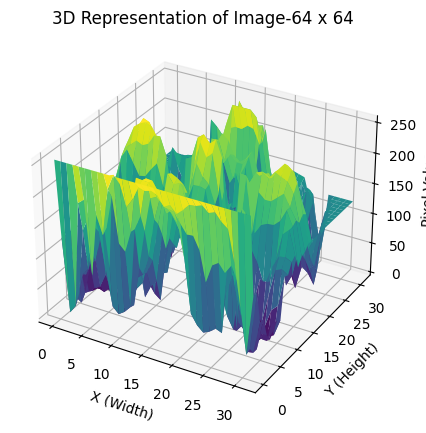

In [116]:
plot_3d_representation(resized_image)

In [96]:
from scipy.interpolate import interp2d, RegularGridInterpolator

In [97]:
def interpolate_image(image, new_size=(1024, 1024)):
    height, width = image.shape
    x = np.linspace(0, width - 1, width)
    y = np.linspace(0, height - 1, height)
    interpolator = RegularGridInterpolator((y, x), image, method='cubic')

    new_x = np.linspace(0, width - 1, new_size[1])
    new_y = np.linspace(0, height - 1, new_size[0])
    new_grid_x, new_grid_y = np.meshgrid(new_x, new_y)
    new_points = np.stack([new_grid_y.ravel(), new_grid_x.ravel()], axis=-1)
    interpolated_image = interpolator(new_points).reshape(new_size)

    return interpolated_image

In [117]:
def plot_3d_representation(image):
    height, width = image.shape
    x = np.arange(width)
    y = np.arange(height)
    x, y = np.meshgrid(x, y)
    z = image

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot the surface
    ax.plot_surface(x, y, z, cmap='viridis', edgecolor='none')
    ax.set_title("3D Representation of Interpolated Image")
    ax.set_xlabel("X (Width)")
    ax.set_ylabel("Y (Height)")
    ax.set_zlabel("Pixel Value")

    plt.show()

In [118]:
interpolated_image = interpolate_image(resized_image)

In [88]:
interpolated_image.shape

(1024, 1024)

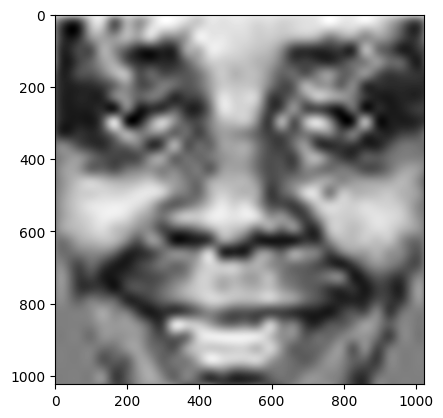

In [119]:
plt.imshow(interpolated_image, cmap='gray')

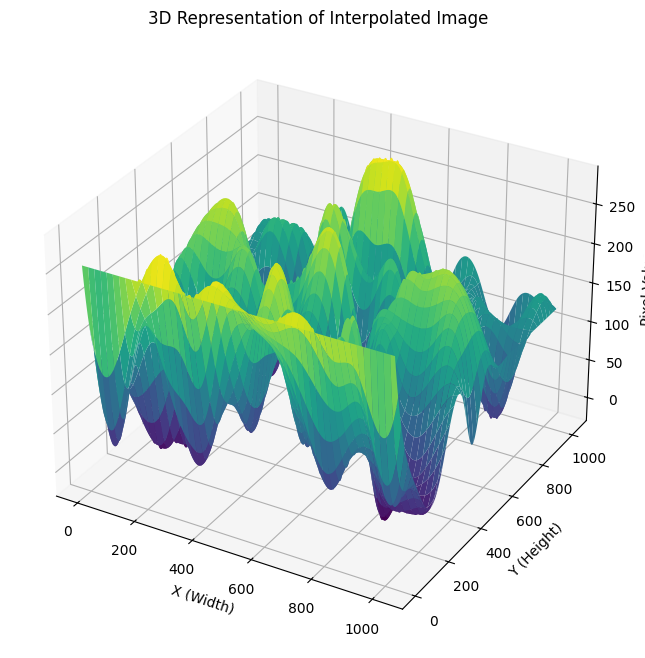

In [107]:
plot_3d_representation(interpolated_image)

In [108]:
def plot_images(resized_image, interpolated_image):
    fig, axes = plt.subplots(1, 2, figsize=(7, 5))

    # Display the 64x64 image
    axes[0].imshow(resized_image, cmap='gray', interpolation='nearest')
    axes[0].set_title("16x16 Image")
    axes[0].axis('off')

    # Display the 256x256 image
    axes[1].imshow(interpolated_image, cmap='gray', interpolation='nearest')
    axes[1].set_title("1024x1024 Interpolated Image")
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

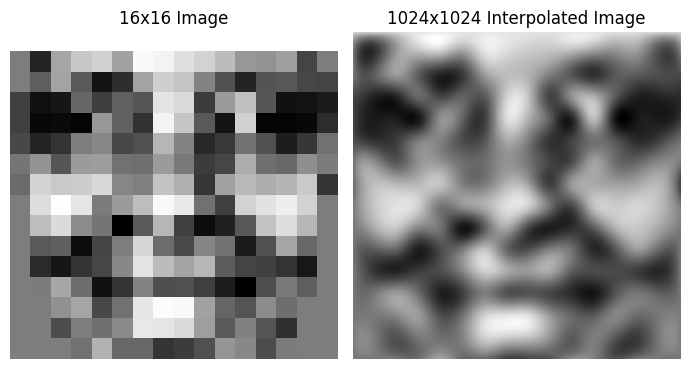

In [109]:
plot_images(resized_image, interpolated_image)